Nvidia Corporation is an American multinational corporation and technology company headquartered in Santa Clara, California, and incorporated in Delaware.It is a software and fabless company which designs and supplies graphics processing units (GPUs), application programming interfaces for data science and high-performance computing as well as system on a chip units for the mobile computing and automotive market. Nvidia is also a dominant supplier of artificial intelligence (AI) hardware and software.

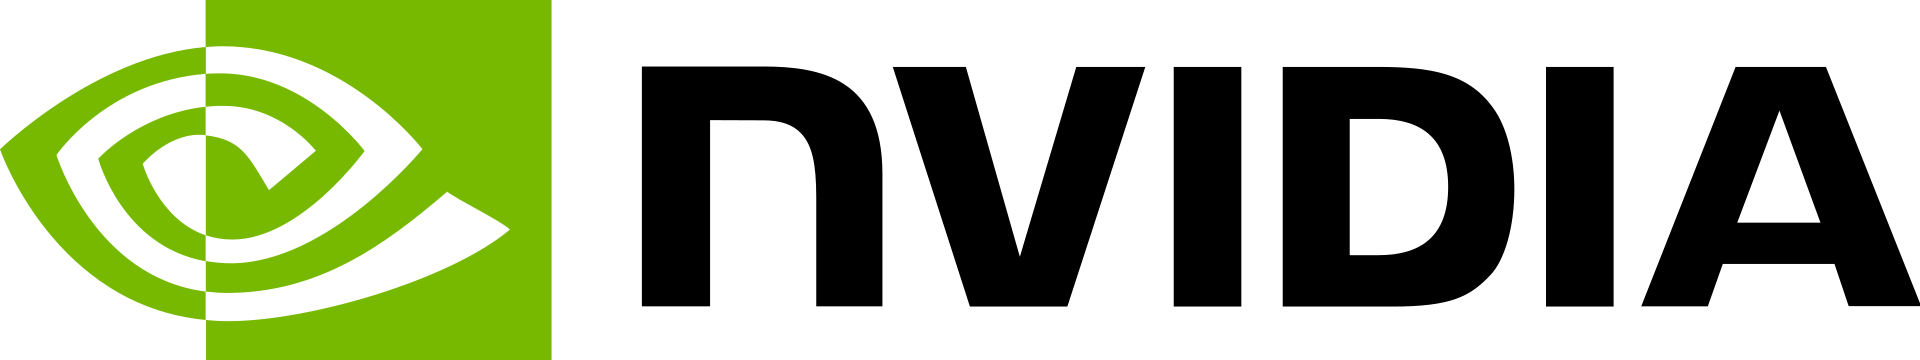

Import libraries

In [1]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch.nn as nn

import random
import torch

def set_random_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.deterministic = True

set_random_seed(42)

In [2]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/73.0 kB 938.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.8/116.8 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 79.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 11.2 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.3-cp310-cp310-linux_x86_64.whl size=727576 sha256=df842a7ce5ed7948b89db23ad5f9fe679027ec9b97e675f253f4d6d8d8f1b512
  Stored in directory: /root/.cache/pip/wheels/0d/32/b7/cad9f818b37cf97df4c87a8308da86a433af81651d98f8d8aa
Successfully built peewee


Import yfinance

In [3]:
# To fetch financial data
import yfinance as yf

Choose the periods and check the data

In [4]:
period = '10y'
interval = '1d'

In [5]:
forex_data = yf.download('NVDA', period=period, interval=interval)

# Set the index to a datetime object
forex_data.index = pd.to_datetime(forex_data.index)

# Display the last five rows
forex_data.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-29,875.950012,879.919983,852.659973,877.570007,877.570007,38897100
2024-04-30,872.400024,888.190002,863.000000,864.020020,864.020020,36370900
2024-05-01,850.770020,860.000000,812.549988,830.409973,830.409973,55986300
2024-05-02,844.489990,862.369995,832.000000,858.169983,858.169983,37789800
2024-05-03,877.890015,892.809998,870.400085,887.890015,887.890015,39595568


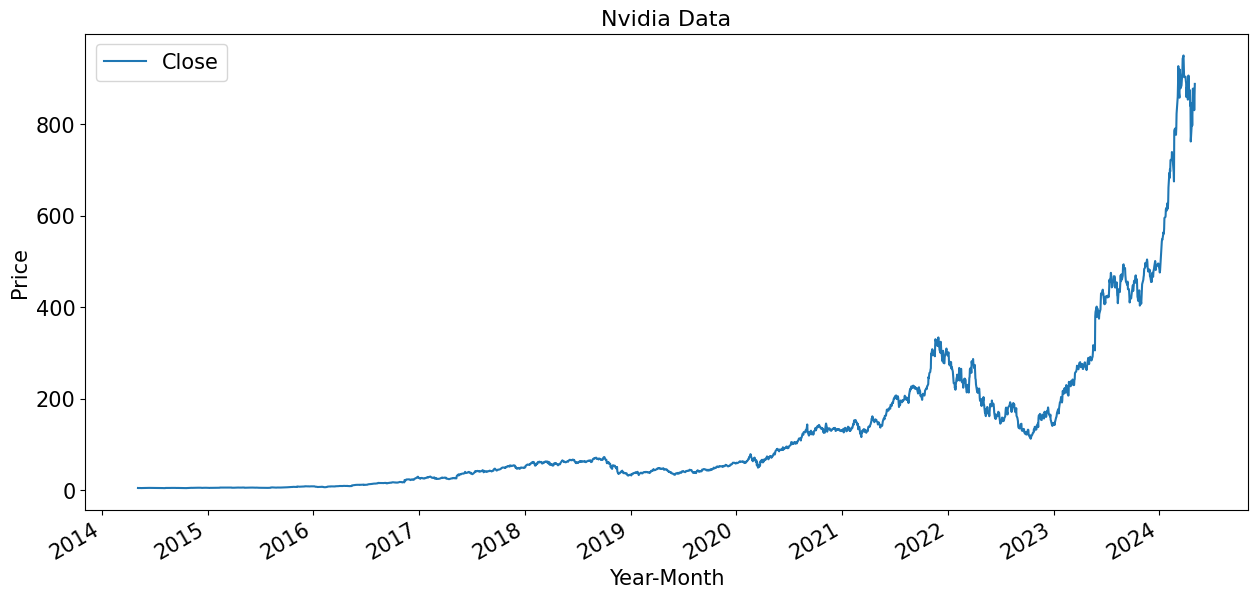

In [6]:
# Plot the close price
plt.figure(figsize=(15, 7))
forex_data['Close'].plot()

# Set the title and axis label
plt.title('Nvidia Data', fontsize=16)
plt.xlabel('Year-Month', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(['Close'], prop={'size': 15})

# Show the plot
plt.show()

In [7]:
forex_data_1 = yf.download('YM=F', period=period, interval=interval)

# Set the index to a datetime object
forex_data_1.index = pd.to_datetime(forex_data_1.index)

# Display the last five rows
forex_data_1.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-29,38490.0,38593.0,38392.0,38559.0,38559.0,97404
2024-04-30,38576.0,38576.0,37925.0,37993.0,37993.0,146966
2024-05-01,37923.0,38527.0,37866.0,38069.0,38069.0,174074
2024-05-02,38126.0,38643.0,38037.0,38382.0,38382.0,149296
2024-05-03,38642.0,38958.0,38584.0,38832.0,38832.0,149296


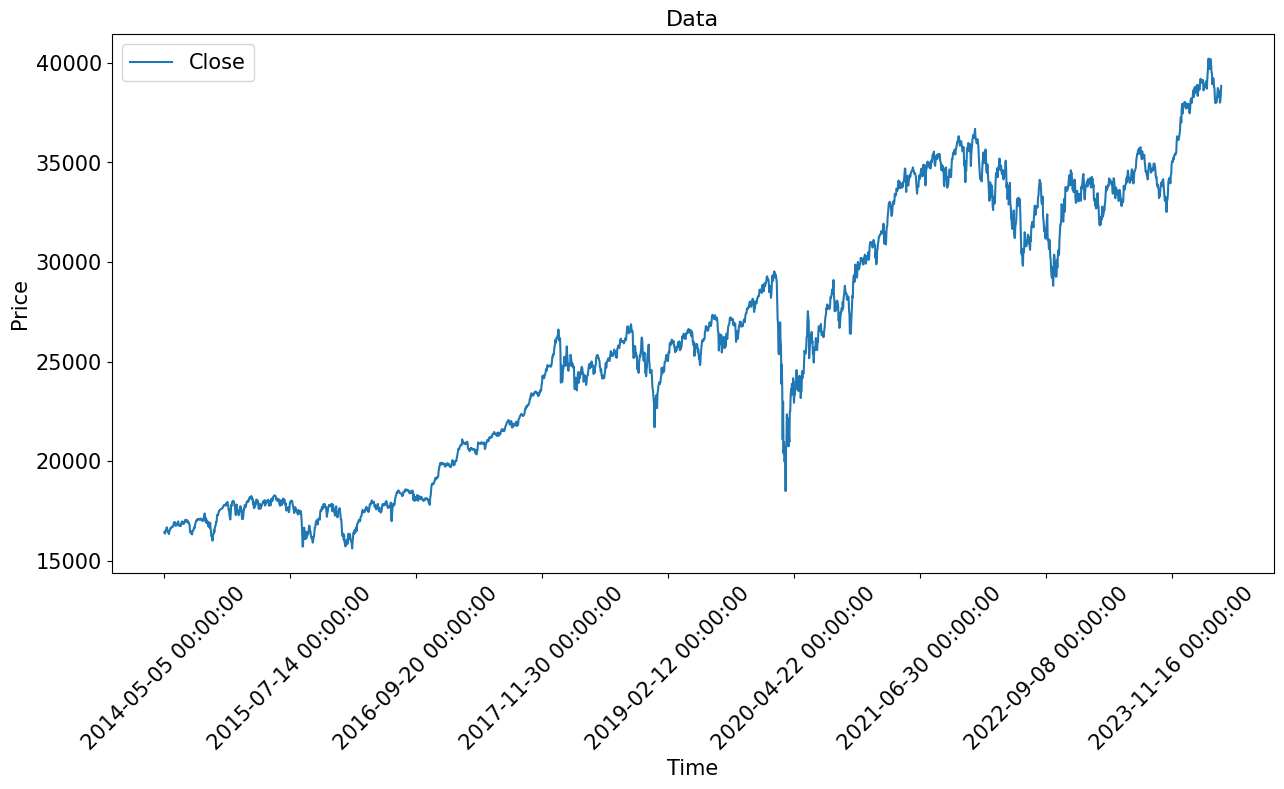

In [8]:
# Transform index type from datetime to string
forex_data_1['dates'] = forex_data_1.index.strftime(
    '%Y-%m-%d %H:%M:%S')

# Plot the series
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(forex_data_1['dates'], forex_data_1['Close'])

# Set title and axis label
plt.title('Data', fontsize=16)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(['Close'], prop={'size': 15})

# Set maximum number of tick locators
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [9]:
forex_data_2 = yf.download('ES=F', period=period, interval=interval)

# Set the index to a datetime object
forex_data_2.index = pd.to_datetime(forex_data_2.index)

# Display the last five rows
forex_data_2.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-29,5140.25,5154.25,5118.75,5147.00,5147.00,1163440
2024-04-30,5148.50,5148.50,5051.00,5067.00,5067.00,1675335
2024-05-01,5050.00,5126.75,5037.75,5046.50,5046.50,1955160
2024-05-02,5057.00,5113.00,5036.25,5091.50,5091.50,1573131
2024-05-03,5110.25,5166.75,5099.25,5154.75,5154.75,1573131


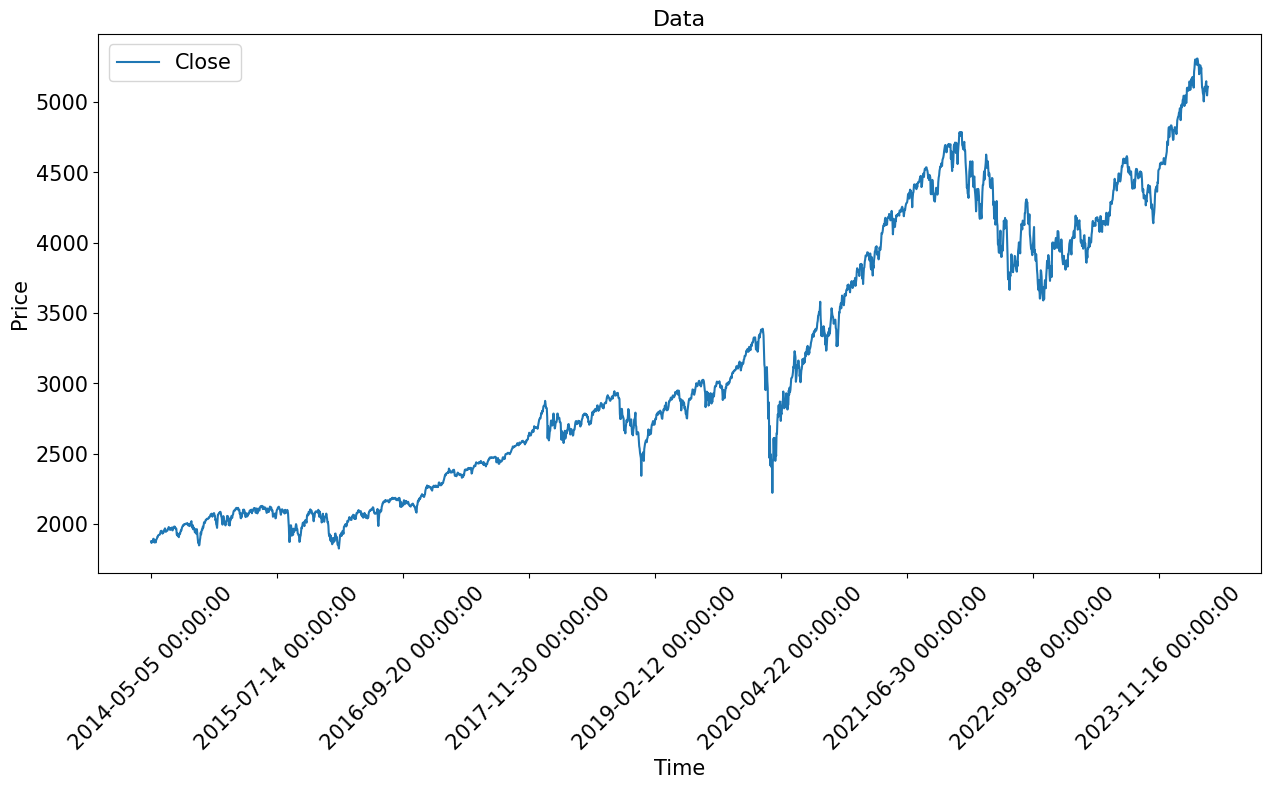

In [ ]:
# Transform index type from datetime to string
forex_data_2['dates'] = forex_data_2.index.strftime(
    '%Y-%m-%d %H:%M:%S')

# Plot the series
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(forex_data_2['dates'], forex_data_2['Close'])

# Set title and axis label
plt.title('Data', fontsize=16)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(['Close'], prop={'size': 15})

# Set maximum number of tick locators
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [10]:
forex_data_3 = yf.download('NQ=F', period=period, interval=interval)

# Set the index to a datetime object
forex_data_3.index = pd.to_datetime(forex_data_3.index)

# Display the last five rows
forex_data_3.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-29,17864.75,17949.00,17791.25,17904.25,17904.25,528891
2024-04-30,17918.50,17920.25,17473.50,17571.25,17571.25,677704
2024-05-01,17462.50,17793.25,17399.25,17438.25,17438.25,791170
2024-05-02,17487.00,17755.25,17386.25,17649.75,17649.75,635300
2024-05-03,17744.25,18050.25,17719.50,18000.75,18000.75,635300


In [11]:
def display(data, pred = None, vert = None, title = 'Prediction'):
  data = np.array(data).reshape((len(data), 1))
  plt.figure(figsize=(12, 6))
  plt.plot(data, label='Some periodic function')
  if pred != None:
    plt.plot(pred, label=title)
  if vert != None:
    plt.axvline(x=vert, c='r', linestyle='--')
  plt.legend()
  plt.grid()
  plt.show()

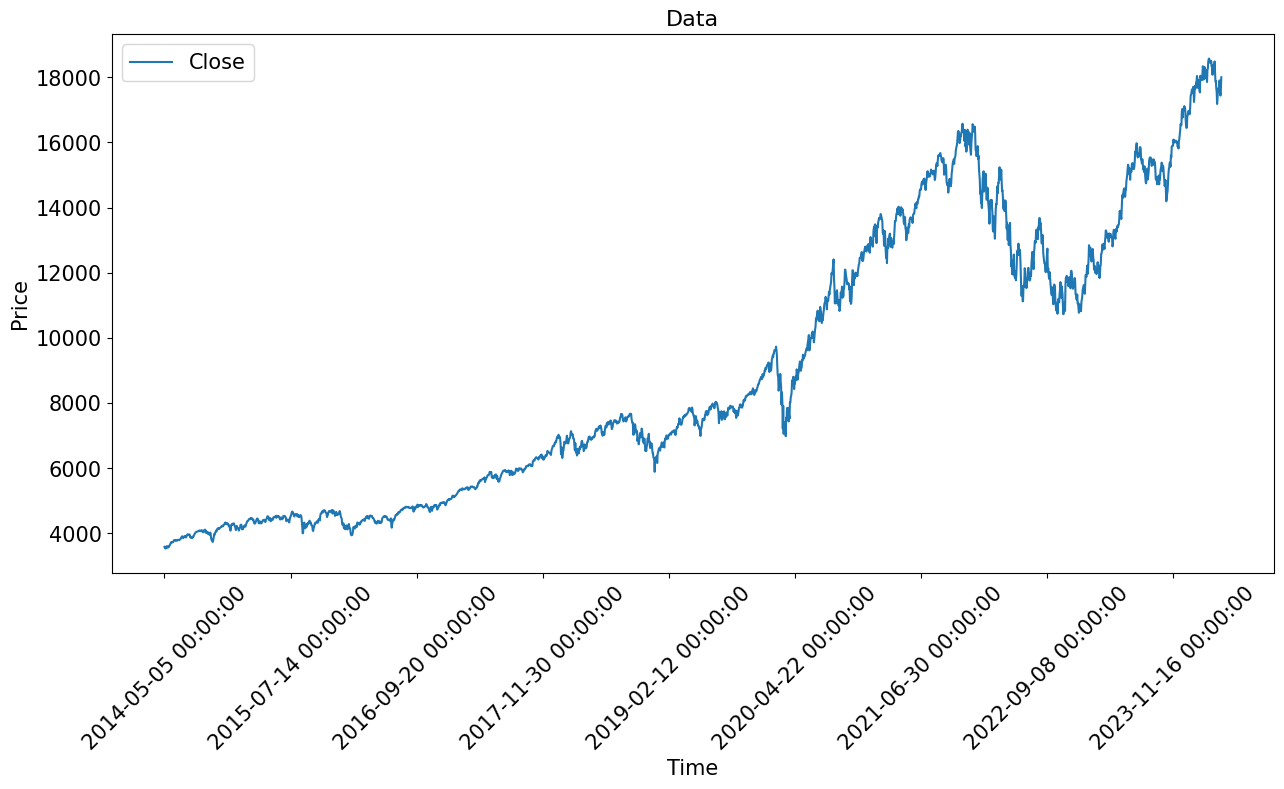

In [12]:
# Transform index type from datetime to string
forex_data_3['dates'] = forex_data_3.index.strftime(
    '%Y-%m-%d %H:%M:%S')

# Plot the series
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(forex_data_3['dates'], forex_data_3['Close'])

# Set title and axis label
plt.title('Data', fontsize=16)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(['Close'], prop={'size': 15})

# Set maximum number of tick locators
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [13]:
df1 = forex_data[['Close']].rename(columns={'Close': 'Nvidia'})
df2 = forex_data_1[['Close']].rename(columns={'Close': 'Dow Jones'})
df3 = forex_data_2[['Close']].rename(columns={'Close': 'S&P'})
df4 = forex_data_3[['Close']].rename(columns={'Close': 'Nasdaq'})
df = pd.merge(df1,df2, how='inner', left_index=True, right_index=True)
df = pd.merge(df,df3, how='inner', left_index=True, right_index=True)
df = pd.merge(df,df4, how='inner', left_index=True, right_index=True)
df

,Nvidia,Dow Jones,S&P,Nasdaq
Date,,,,
2014-05-05,4.657500,16444.0,1875.75,3590.75
2014-05-06,4.562500,16360.0,1864.25,3551.00
2014-05-07,4.567500,16468.0,1874.25,3540.50
2014-05-08,4.625000,16510.0,1872.25,3537.50
2014-05-09,4.512500,16527.0,1873.50,3548.00
...,...,...,...,...
2024-04-29,877.570007,38559.0,5147.00,17904.25
2024-04-30,864.020020,37993.0,5067.00,17571.25
2024-05-01,830.409973,38069.0,5046.50,17438.25


In [14]:
train_size = int(len(df)-20)

train_data = df[:train_size].to_numpy()

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler()
train_df = scaler1.fit_transform(train_data)


In [26]:
input_size = 4
hidden_size = 40
num_classes = 4


In [27]:
set_random_seed(42)
import warnings
warnings.filterwarnings('ignore')

# create data "ensemble"
def sliding_windows(data, seq_length):
    x = []
    y = []

    for i in range(len(data) - seq_length):
        _x = data[i:(i + seq_length)] # picking several sequential observations
        _y = data[i+seq_length] # picking the subsequent observation
        x.append(_x)
        y.append(_y)

    return torch.Tensor(np.array(x)), torch.Tensor(np.array(y))

# set length of the ensemble; accuracy of the predictions and
# speed perfomance almost always depend on it size
seq_length =  40 # compare 2 and 32
x, y = sliding_windows(train_df, seq_length)
print("Example of the obtained data:\n")
print("Data corresponding to the first x:")
print(x[0])
print("Data corresponding to the first y:")
print(y[0])


x_train = x
y_train = y




# Define new LSTM based model
class LSTMPredictor(nn.Module):

    def __init__(self, input_size, hidden_size, num_classes):
        # hidden_size == number of neurons
        super().__init__()
        self.lstm1 = nn.LSTM(input_size=input_size, hidden_size=hidden_size, batch_first=True, dropout=0.2)
        self.lstm2 = nn.LSTM(input_size=input_size, hidden_size=hidden_size//2, batch_first=True, dropout=0.2)
        self.lstm3 = nn.LSTM(input_size=input_size, hidden_size=hidden_size//4, batch_first=True, dropout=0.2)
        self.lstm4 = nn.LSTM(input_size=input_size, hidden_size=hidden_size//8, batch_first=True, dropout=0.2)
        self.fc_1 = nn.Linear(4*hidden_size, 64) # fully connected
        self.fc_11 = nn.Linear(64, 64)
        self.a = hidden_size + hidden_size//2 + hidden_size//4 + hidden_size//8
        self.fc_2 = nn.Linear(self.a, 1) # fully connected
        self.fc_3 = nn.Linear(self.a, 1) # fully connected
        self.fc_4 = nn.Linear(self.a, 1) # fully connected
        self.fc_5 = nn.Linear(self.a, 1) # fully connected
        self.relu = nn.Tanh()
        self.drop = nn.Dropout(p=0.2)

    def forward(self, x):
        out, (h1, c) = self.lstm1(x)
        out, (h2, c) = self.lstm2(x)
        out, (h3, c) = self.lstm3(x)
        out, (h4, c) = self.lstm4(x)

        out1 = torch.cat((h1, h2, h3, h4), 2)
        #out1 = self.drop(self.fc_11(self.drop(self.fc_1(self.relu(out)))))
        out2 = self.fc_2(self.relu(out1))
        out3 = self.fc_3(self.relu(out1))
        out4 = self.fc_4(self.relu(out1))
        out5 = self.fc_5(self.relu(out1))

        return torch.cat((out2, out3, out4, out5), 2)

lstm =  LSTMPredictor(input_size=input_size, hidden_size=hidden_size, num_classes=num_classes)


lstm.train()

print("LSTM training process with MSE loss:")

num_epochs = 2000
learning_rate = 0.001

criterion = torch.nn.L1Loss() # mean-squared error for regression
optimizer = torch.optim.AdamW(lstm.parameters(), lr=learning_rate)

 # Train the model
for epoch in range(num_epochs):
    y_pred = lstm(x_train)
    optimizer.zero_grad()
    #print(outputs.shape)
    loss = criterion(y_pred, y_train.unsqueeze(0))
    loss.backward()

    optimizer.step()
    if epoch % 200 == 0:
        print(f"Epoch: {epoch},".ljust(15), "loss: %1.5f" % (loss.item()))

Example of the obtained data:

Data corresponding to the first x:
tensor([[0.0005, 0.0338, 0.0147, 0.0035],
        [0.0004, 0.0304, 0.0114, 0.0009],
        [0.0004, 0.0348, 0.0143, 0.0002],
        [0.0005, 0.0365, 0.0137, 0.0000],
        [0.0003, 0.0372, 0.0141, 0.0007],
        [0.0005, 0.0424, 0.0196, 0.0047],
        [0.0004, 0.0432, 0.0200, 0.0047],
        [0.0003, 0.0396, 0.0174, 0.0039],
        [0.0003, 0.0329, 0.0123, 0.0017],
        [0.0003, 0.0347, 0.0144, 0.0030],
        [0.0005, 0.0353, 0.0166, 0.0050],
        [0.0004, 0.0295, 0.0125, 0.0039],
        [0.0004, 0.0361, 0.0174, 0.0064],
        [0.0004, 0.0372, 0.0189, 0.0073],
        [0.0004, 0.0396, 0.0208, 0.0091],
        [0.0005, 0.0424, 0.0243, 0.0122],
        [0.0006, 0.0413, 0.0243, 0.0119],
        [0.0006, 0.0435, 0.0268, 0.0132],
        [0.0006, 0.0444, 0.0278, 0.0132],
        [0.0006, 0.0451, 0.0279, 0.0126],
        [0.0005, 0.0448, 0.0280, 0.0129],
        [0.0006, 0.0450, 0.0291, 0.0137],
        [0

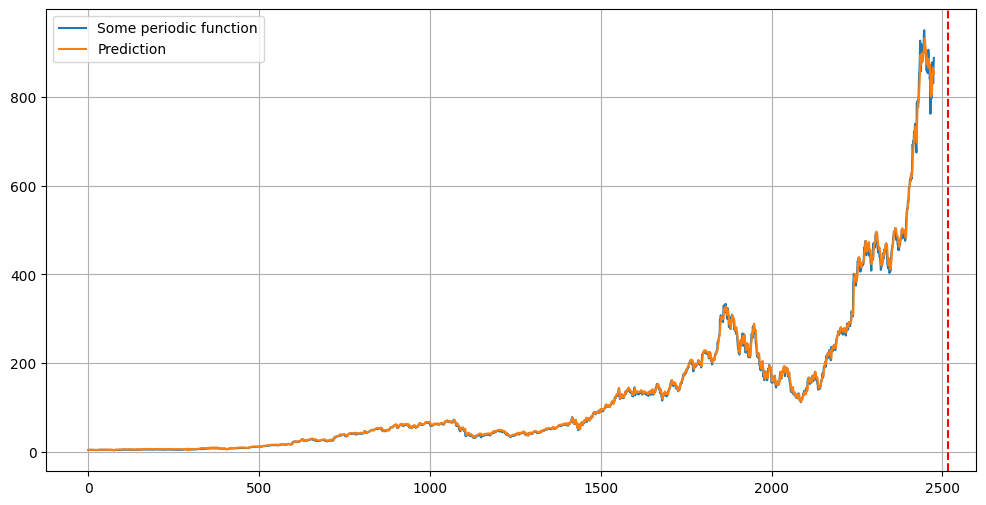

In [28]:
x_s, y_s = sliding_windows(scaler1.transform(df.to_numpy().reshape(-1,num_classes)), seq_length)

lstm.eval()

train_predict = lstm(x_s)
display(data=df[seq_length:len(df)].to_numpy().reshape(-1,num_classes)[:,0], pred=list(scaler1.inverse_transform(train_predict.detach().numpy().reshape(-1,num_classes)).reshape(-1,num_classes)[:,0]), vert=train_size)

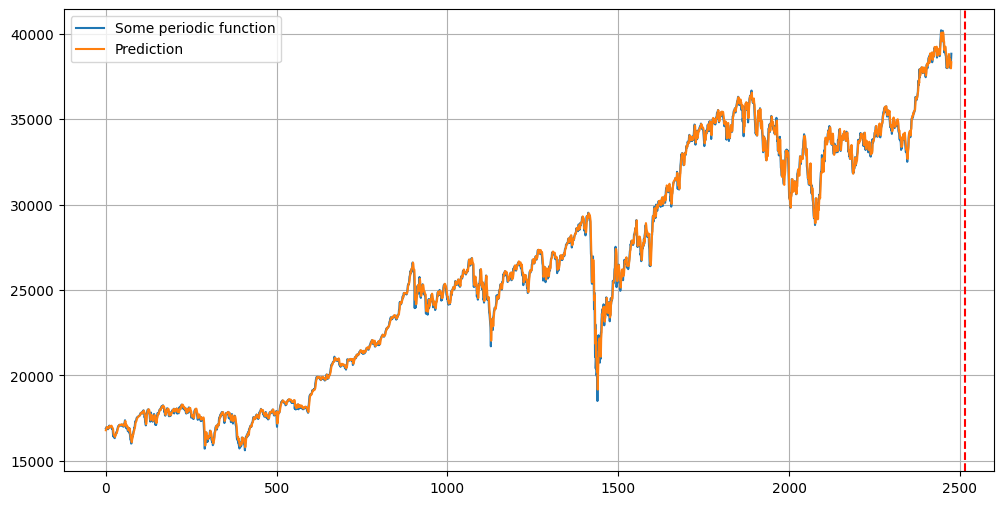

In [29]:
x_s, y_s = sliding_windows(scaler1.transform(df.to_numpy().reshape(-1,num_classes)), seq_length)

lstm.eval()

train_predict = lstm(x_s)
display(data=df[seq_length:len(df)].to_numpy().reshape(-1,num_classes)[:,1], pred=list(scaler1.inverse_transform(train_predict.detach().numpy().reshape(-1,num_classes)).reshape(-1,num_classes)[:,1]), vert=train_size)

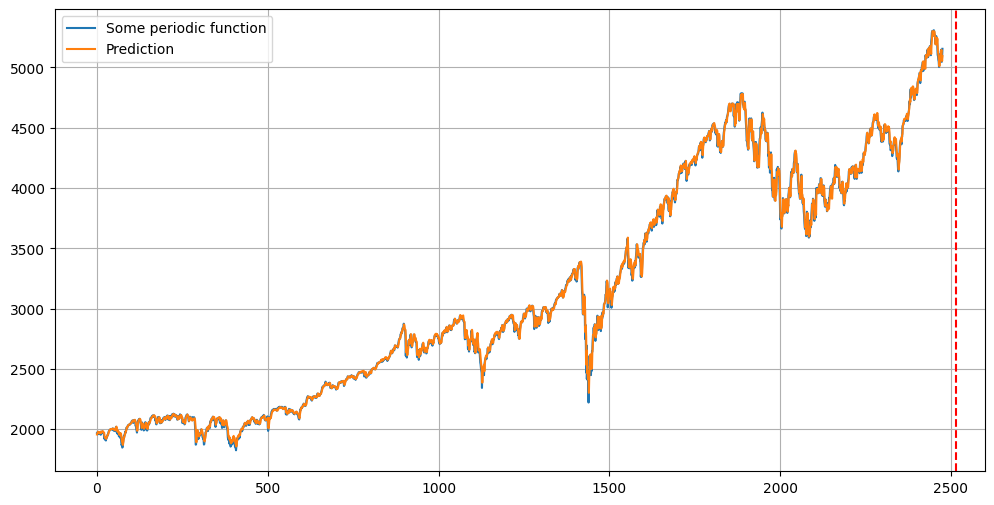

In [30]:
x_s, y_s = sliding_windows(scaler1.transform(df.to_numpy().reshape(-1,num_classes)), seq_length)

lstm.eval()

train_predict = lstm(x_s)
display(data=df[seq_length:len(df)].to_numpy().reshape(-1,num_classes)[:,2], pred=list(scaler1.inverse_transform(train_predict.detach().numpy().reshape(-1,num_classes)).reshape(-1,num_classes)[:,2]), vert=train_size)

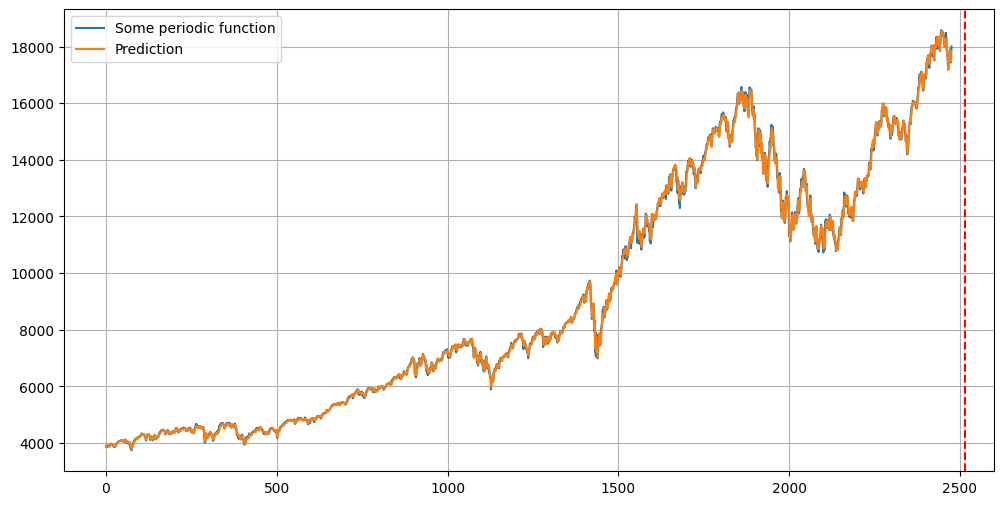

In [31]:
x_s, y_s = sliding_windows(scaler1.transform(df.to_numpy().reshape(-1,num_classes)), seq_length)

lstm.eval()

train_predict = lstm(x_s)
display(data=df[seq_length:len(df)].to_numpy().reshape(-1,num_classes)[:,3], pred=list(scaler1.inverse_transform(train_predict.detach().numpy().reshape(-1,num_classes)).reshape(-1,num_classes)[:,3]), vert=train_size)

In [32]:
data_pred = scaler1.transform(df.to_numpy().reshape(-1,num_classes))

x_s, y_s = sliding_windows(data_pred, seq_length)
for i in range(20):
    data_pred = np.append(data_pred, (lstm(x_s).detach().numpy()[0][-1]).reshape(-1,num_classes),  axis=0)
    x_s, y_s = sliding_windows(data_pred, seq_length)
data_pred

array([[4.86348709e-04, 3.38293893e-02, 1.47101033e-02, 3.54120601e-03],
       [3.85907254e-04, 3.04139221e-02, 1.14092997e-02, 8.97770537e-04],
       [3.91193779e-04, 3.48052370e-02, 1.42795637e-02, 1.99504564e-04],
       ...,
       [9.13768768e-01, 9.34319377e-01, 9.44182754e-01, 9.31446195e-01],
       [9.13944602e-01, 9.33573484e-01, 9.43171680e-01, 9.30268884e-01],
       [9.14415002e-01, 9.33740020e-01, 9.43120003e-01, 9.29752290e-01]])

In [33]:
df[-20:]

,Nvidia,Dow Jones,S&P,Nasdaq
Date,,,,
2024-04-08,871.330017,39219.0,5253.25,18295.00
2024-04-09,853.539978,39196.0,5260.25,18359.75
2024-04-10,870.390015,38757.0,5207.75,18196.75
2024-04-11,906.159973,38732.0,5243.25,18485.00
2024-04-12,881.859985,38238.0,5167.50,18179.25
2024-04-15,860.010010,37993.0,5104.00,17876.25
2024-04-16,874.150024,38046.0,5092.50,17881.25
2024-04-17,840.349976,37990.0,5062.25,17658.50
2024-04-18,846.710022,38007.0,5049.00,17547.25


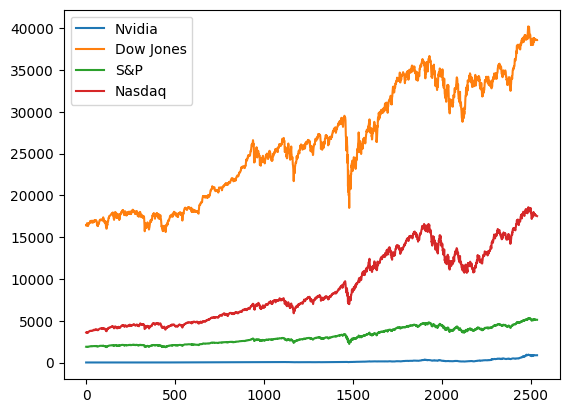

In [34]:
plt.plot(scaler1.inverse_transform(data_pred.reshape(-1,num_classes)))
plt.legend(['Nvidia','Dow Jones','S&P','Nasdaq'], loc=2)

In [35]:
train_size = int(len(df))

train_data = df[:train_size].to_numpy()
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler()
train_df = scaler1.fit_transform(train_data)


set_random_seed(42)
import warnings
warnings.filterwarnings('ignore')

# create data "ensemble"
def sliding_windows(data, seq_length):
    x = []
    y = []

    for i in range(len(data) - seq_length):
        _x = data[i:(i + seq_length)] # picking several sequential observations
        _y = data[i+seq_length] # picking the subsequent observation
        x.append(_x)
        y.append(_y)

    return torch.Tensor(np.array(x)), torch.Tensor(np.array(y))

# set length of the ensemble; accuracy of the predictions and
# speed perfomance almost always depend on it size
seq_length = 40 # compare 2 and 32
x, y = sliding_windows(train_df, seq_length)
print("Example of the obtained data:\n")
print("Data corresponding to the first x:")
print(x[0])
print("Data corresponding to the first y:")
print(y[0])


x_train = x
y_train = y




# Define new LSTM based model
class LSTMPredictor(nn.Module):

    def __init__(self, input_size, hidden_size, num_classes):
        # hidden_size == number of neurons
        super().__init__()
        self.lstm1 = nn.LSTM(input_size=input_size, hidden_size=hidden_size, batch_first=True, dropout=0.2)
        self.lstm2 = nn.LSTM(input_size=input_size, hidden_size=hidden_size//2, batch_first=True, dropout=0.2)
        self.lstm3 = nn.LSTM(input_size=input_size, hidden_size=hidden_size//4, batch_first=True, dropout=0.2)
        self.lstm4 = nn.LSTM(input_size=input_size, hidden_size=hidden_size//8, batch_first=True, dropout=0.2)
        self.fc_1 = nn.Linear(4*hidden_size, 64) # fully connected
        self.fc_11 = nn.Linear(64, 64)
        self.a = hidden_size + hidden_size//2 + hidden_size//4 + hidden_size//8
        self.fc_2 = nn.Linear(self.a, 1) # fully connected
        self.fc_3 = nn.Linear(self.a, 1) # fully connected
        self.fc_4 = nn.Linear(self.a, 1) # fully connected
        self.fc_5 = nn.Linear(self.a, 1) # fully connected
        self.relu = nn.Tanh()
        self.drop = nn.Dropout(p=0.2)

    def forward(self, x):
        out, (h1, c) = self.lstm1(x)
        out, (h2, c) = self.lstm2(x)
        out, (h3, c) = self.lstm3(x)
        out, (h4, c) = self.lstm4(x)

        out1 = torch.cat((h1, h2, h3, h4), 2)
        #out1 = self.drop(self.fc_11(self.drop(self.fc_1(self.relu(out)))))
        out2 = self.fc_2(self.relu(out1))
        out3 = self.fc_3(self.relu(out1))
        out4 = self.fc_4(self.relu(out1))
        out5 = self.fc_5(self.relu(out1))

        return torch.cat((out2, out3, out4, out5), 2)

lstm =  LSTMPredictor(input_size=input_size, hidden_size=hidden_size, num_classes=num_classes)

lstm.train()

print("LSTM training process with MSE loss:")

num_epochs = 2000
learning_rate = 0.001

criterion = torch.nn.L1Loss() # mean-squared error for regression
optimizer = torch.optim.AdamW(lstm.parameters(), lr=learning_rate)

 # Train the model
for epoch in range(num_epochs):
    y_pred = lstm(x_train)
    optimizer.zero_grad()
    #print(outputs.shape)
    loss = criterion(y_pred, y_train.unsqueeze(0))
    loss.backward()

    optimizer.step()
    if epoch % 200 == 0:
        print(f"Epoch: {epoch},".ljust(15), "loss: %1.5f" % (loss.item()))

Example of the obtained data:

Data corresponding to the first x:
tensor([[0.0005, 0.0338, 0.0147, 0.0035],
        [0.0004, 0.0304, 0.0114, 0.0009],
        [0.0004, 0.0348, 0.0143, 0.0002],
        [0.0005, 0.0365, 0.0137, 0.0000],
        [0.0003, 0.0372, 0.0141, 0.0007],
        [0.0005, 0.0424, 0.0196, 0.0047],
        [0.0004, 0.0432, 0.0200, 0.0047],
        [0.0003, 0.0396, 0.0174, 0.0039],
        [0.0003, 0.0329, 0.0123, 0.0017],
        [0.0003, 0.0347, 0.0144, 0.0030],
        [0.0005, 0.0353, 0.0166, 0.0050],
        [0.0004, 0.0295, 0.0125, 0.0039],
        [0.0004, 0.0361, 0.0174, 0.0064],
        [0.0004, 0.0372, 0.0189, 0.0073],
        [0.0004, 0.0396, 0.0208, 0.0091],
        [0.0005, 0.0424, 0.0243, 0.0122],
        [0.0006, 0.0413, 0.0243, 0.0119],
        [0.0006, 0.0435, 0.0268, 0.0132],
        [0.0006, 0.0444, 0.0278, 0.0132],
        [0.0006, 0.0451, 0.0279, 0.0126],
        [0.0005, 0.0448, 0.0280, 0.0129],
        [0.0006, 0.0450, 0.0291, 0.0137],
        [0

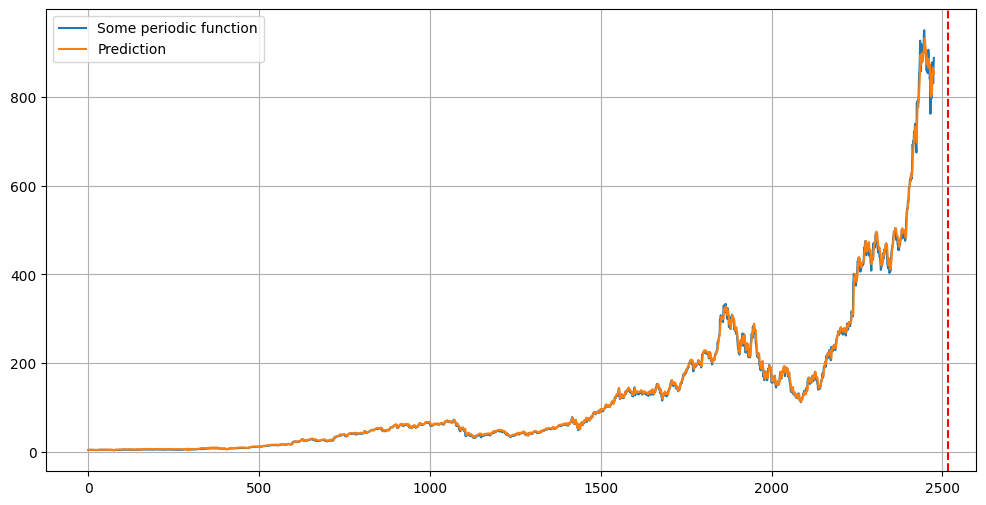

In [36]:
x_s, y_s = sliding_windows(scaler1.transform(df.to_numpy().reshape(-1,num_classes)), seq_length)

lstm.eval()

train_predict = lstm(x_s)
display(data=df[seq_length:len(df)].to_numpy().reshape(-1,num_classes)[:,0], pred=list(scaler1.inverse_transform(train_predict.detach().numpy().reshape(-1,num_classes)).reshape(-1,num_classes)[:,0]), vert=train_size)

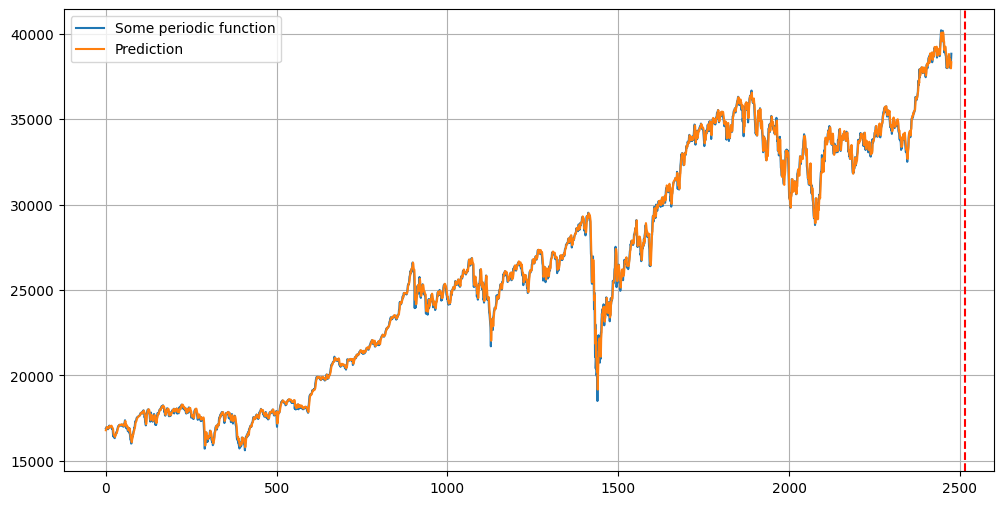

In [37]:
x_s, y_s = sliding_windows(scaler1.transform(df.to_numpy().reshape(-1,num_classes)), seq_length)

lstm.eval()

train_predict = lstm(x_s)
display(data=df[seq_length:len(df)].to_numpy().reshape(-1,num_classes)[:,1], pred=list(scaler1.inverse_transform(train_predict.detach().numpy().reshape(-1,num_classes)).reshape(-1,num_classes)[:,1]), vert=train_size)

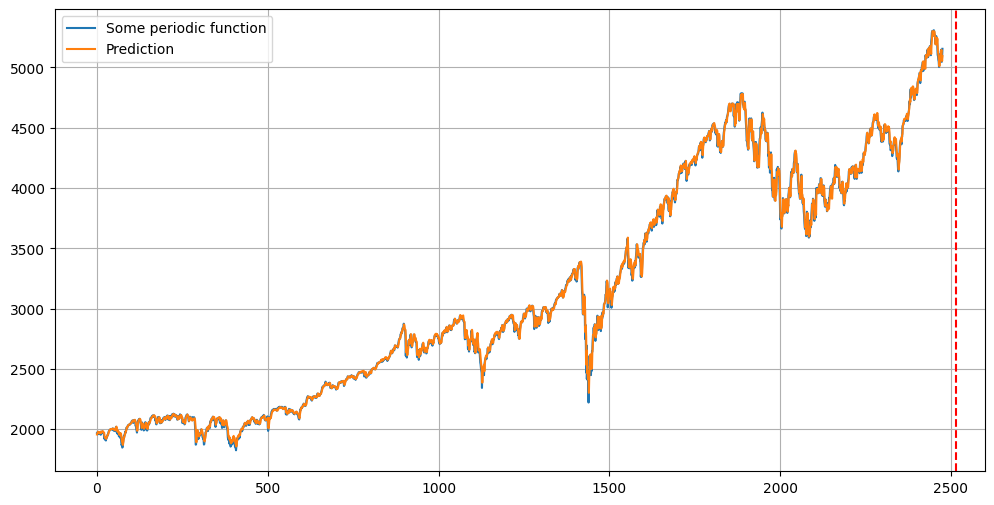

In [38]:
x_s, y_s = sliding_windows(scaler1.transform(df.to_numpy().reshape(-1,num_classes)), seq_length)

lstm.eval()

train_predict = lstm(x_s)
display(data=df[seq_length:len(df)].to_numpy().reshape(-1,num_classes)[:,2], pred=list(scaler1.inverse_transform(train_predict.detach().numpy().reshape(-1,num_classes)).reshape(-1,num_classes)[:,2]), vert=train_size)

In [39]:
data_pred = scaler1.transform(df[:-20].to_numpy().reshape(-1,num_classes))

x_s, y_s = sliding_windows(data_pred, seq_length)
for i in range(20):
    data_pred = np.append(data_pred, (lstm(x_s).detach().numpy()[0][-1]).reshape(-1,num_classes),  axis=0)
    x_s, y_s = sliding_windows(data_pred, seq_length)
data_pred

array([[4.86348709e-04, 3.38293893e-02, 1.47101033e-02, 3.54120601e-03],
       [3.85907254e-04, 3.04139221e-02, 1.14092997e-02, 8.97770537e-04],
       [3.91193779e-04, 3.48052370e-02, 1.42795637e-02, 1.99504564e-04],
       ...,
       [9.20552969e-01, 9.51550245e-01, 9.58709717e-01, 9.46093976e-01],
       [9.20621753e-01, 9.50867891e-01, 9.57709312e-01, 9.44963634e-01],
       [9.20848668e-01, 9.50637937e-01, 9.57194507e-01, 9.44176137e-01]])

In [40]:
df[-20:]

,Nvidia,Dow Jones,S&P,Nasdaq
Date,,,,
2024-04-08,871.330017,39219.0,5253.25,18295.00
2024-04-09,853.539978,39196.0,5260.25,18359.75
2024-04-10,870.390015,38757.0,5207.75,18196.75
2024-04-11,906.159973,38732.0,5243.25,18485.00
2024-04-12,881.859985,38238.0,5167.50,18179.25
2024-04-15,860.010010,37993.0,5104.00,17876.25
2024-04-16,874.150024,38046.0,5092.50,17881.25
2024-04-17,840.349976,37990.0,5062.25,17658.50
2024-04-18,846.710022,38007.0,5049.00,17547.25


In [41]:
pd.DataFrame(scaler1.inverse_transform(data_pred.reshape(-1,num_classes))[-(20):-1])

,0,1,2,3
0,874.335912,39044.530797,5190.918954,17982.658174
1,877.994789,39229.708318,5232.733061,18117.387582
2,874.219158,39040.232729,5193.050195,17982.799788
3,876.403029,39191.515326,5216.415558,18043.557490
4,874.344255,39056.560108,5191.600502,17959.936327
5,875.618791,39159.062863,5205.103762,17989.361526
6,874.374416,39067.472392,5188.677236,17931.293590
7,875.124829,39131.963928,5196.312366,17943.204387
8,874.332980,39069.269606,5184.937441,17900.154684
9,874.796499,39107.374643,5188.860810,17901.550208


In [42]:
data_pred = scaler1.transform(df.to_numpy().reshape(-1,num_classes))

x_s, y_s = sliding_windows(data_pred, seq_length)
for i in range(20):
    data_pred = np.append(data_pred, (lstm(x_s).detach().numpy()[0][-1]).reshape(-1,num_classes),  axis=0)
    x_s, y_s = sliding_windows(data_pred, seq_length)
data_pred

array([[4.86348709e-04, 3.38293893e-02, 1.47101033e-02, 3.54120601e-03],
       [3.85907254e-04, 3.04139221e-02, 1.14092997e-02, 8.97770537e-04],
       [3.91193779e-04, 3.48052370e-02, 1.42795637e-02, 1.99504564e-04],
       ...,
       [9.13768768e-01, 9.34319377e-01, 9.44182754e-01, 9.31446195e-01],
       [9.13944602e-01, 9.33573484e-01, 9.43171680e-01, 9.30268884e-01],
       [9.14415002e-01, 9.33740020e-01, 9.43120003e-01, 9.29752290e-01]])

In [43]:
pd.DataFrame(scaler1.inverse_transform(data_pred.reshape(-1,num_classes))[-(20):-1])

,0,1,2,3
0,856.452333,38329.072592,5094.359591,17609.737920
1,873.055682,38806.961415,5161.764789,17910.635003
2,862.890124,38449.837737,5103.370070,17691.409652
3,868.961531,38778.162017,5153.982841,17831.559822
4,864.422408,38523.734594,5113.674495,17690.297357
5,867.335833,38736.764531,5145.660971,17767.104923
6,864.962259,38562.833523,5118.654452,17671.307662
7,866.762100,38698.046741,5138.323213,17713.657361
8,865.479729,38581.339254,5120.151491,17647.403609
9,866.740678,38666.333101,5132.059902,17669.685377


In [44]:
df_pred = scaler1.inverse_transform(data_pred.reshape(-1,num_classes))
df_pred

array([[4.65749979e+00, 1.64440000e+04, 1.87575000e+03, 3.59075000e+03],
       [4.56250000e+00, 1.63600000e+04, 1.86425000e+03, 3.55100000e+03],
       [4.56750011e+00, 1.64680000e+04, 1.87425000e+03, 3.54050000e+03],
       ...,
       [8.68460579e+02, 3.85906508e+04, 5.11403271e+03, 1.75438893e+04],
       [8.68626886e+02, 3.85723063e+04, 5.11051013e+03, 1.75261858e+04],
       [8.69071801e+02, 3.85764020e+04, 5.11033009e+03, 1.75184176e+04]])

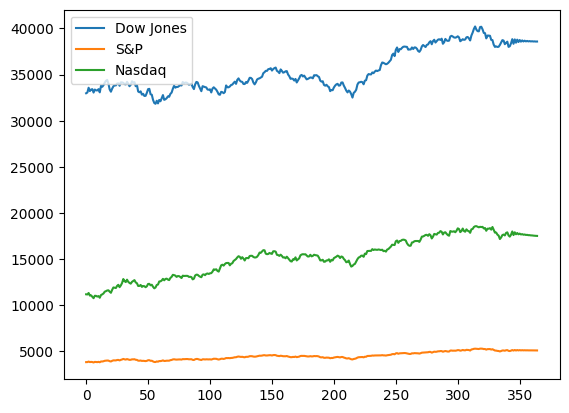

In [45]:
plt.plot(df_pred[-365:,1:4])
plt.legend(['Dow Jones','S&P','Nasdaq'], loc=2)

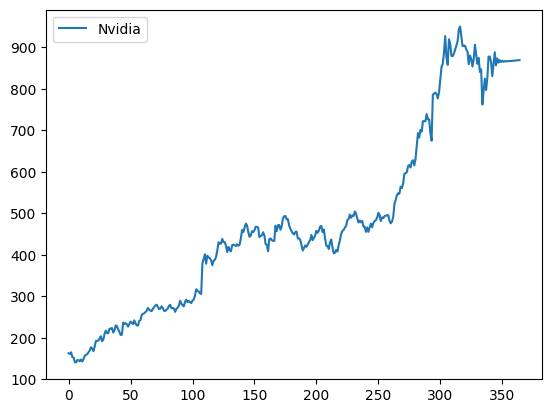

In [46]:
plt.plot(df_pred[-365:,0])
plt.legend(['Nvidia'], loc=2)